In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [21]:
X,Y=sklearn.datasets.make_circles(n_samples=500,noise=0.2,factor=0.2)

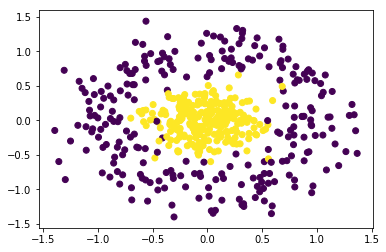

In [23]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
input_size=2
#3 Layer network 4HI-3H2-2 Output
layers=[4,3]
output=2

In [13]:
a=np.array([[10,20],[30,40]])
print(np.sum(a,axis=1,keepdims=True))

[[30]
 [70]]


In [20]:
def softmax(a):
    ea=np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)



In [27]:
a=np.array([[20,10],[20,20]])                             #Higher activation means Higher probability
softmax(a)

array([[9.99954602e-01, 4.53978687e-05],
       [5.00000000e-01, 5.00000000e-01]])

In [63]:
class Neural_Network:
    def __init__(self,input_size,hidden_layers,output_size):
        np.random.seed(0)
        model={}
        model['W1']=np.random.randn(input_size,hidden_layers[0])
        model['b1']=np.zeros((1,hidden_layers[0]))
        
        model['W2']=np.random.randn(hidden_layers[0],hidden_layers[1])
        model['b2']=np.zeros((1,hidden_layers[1]))
        
        model['W3']=np.random.randn(hidden_layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        
    def forward(self,x):
            W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
            b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
            
            z1=np.dot(x,W1) + b1
            a1=np.tanh(z1)
            
            z2=np.dot(a1,W2) +b2
            a2=np.tanh(z2)
            
            z3=np.dot(a2,W3) + b3
            y_=softmax(z3)
            
            # Store the ouputs of each layer for backprop later
            self.actiavtion_outputs=(a1,a2,y_)
            
            return y_
        
    def back(self,x,y,learning_rate=0.001):
            W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
            b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
            a1,a2,y_=self.actiavtion_outputs
            
            #Final Layer
            
            delta3=y_-y
            
            dw3=np.dot(a2.T,delta3)
            db3=np.sum(delta3,axis=0)
            
            delta2=np.dot(delta3,W3.T)*(1-np.square(a2))
            dw2=np.dot(a1.T,delta2)
            db2=np.sum(delta2,axis=0)
            
            delta1=np.dot(delta2,W2.T)*(1-np.square(a1))
            dw1=np.dot(x.T,delta1)
            db1=np.sum(delta1,axis=0)
            
            # Gradient Descent
            self.model['W1']-=learning_rate*dw1
            self.model['W2']-=learning_rate*dw2
            self.model['W3']-=learning_rate*dw3
            
            
            self.model['b1']-=learning_rate*db1
            self.model['b2']-=learning_rate*db2
            self.model['b3']-=learning_rate*db3
    def predict(self,x):
            y_pred=self.forward(x)
            return np.argmax(y_pred,axis=1)
            

In [64]:
def loss(y_oht,pred):
    #One hot notation
    
    l=-np.mean(y_oht*np.log(pred))
    return l
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [65]:
labels=one_hot(np.array([0,0,1,2]),depth=3)
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [66]:
model=Neural_Network(input_size=2,hidden_layers=layers,output_size=2)

In [67]:
model.forward(X[0].reshape(1,-1))

array([[0.1586091, 0.8413909]])

In [68]:
def train(X,Y,model,epochs=50):
    train_loss=[]
    
    classes=len(np.unique(Y))
    Y_OHT=one_hot(Y,classes)
    
    for epoch in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        train_loss.append(l)
        model.back(X,Y_OHT)
        if epoch%5==0:
            print("Epoch ",l)
    plt.plot(train_loss)
    plt.show()
        

In [69]:
from visualise import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

ModuleNotFoundError: No module named 'visualise'

Epoch  0.7255934960116663
Epoch  0.46761407449358217
Epoch  0.2718125342316763
Epoch  0.22335547347470122
Epoch  0.18608089781780995
Epoch  0.16114773377477662
Epoch  0.14056600292798715
Epoch  0.12313707055193951
Epoch  0.10825811698821305
Epoch  0.09592384414025627
Epoch  0.08593671123284592
Epoch  0.07795171355640712
Epoch  0.07159970307823219
Epoch  0.06654320632373403
Epoch  0.06249508141407915
Epoch  0.059223708930265115
Epoch  0.0565495865191062
Epoch  0.05433683545278679
Epoch  0.05248356564379333
Epoch  0.05091338517531038
Epoch  0.049568719207488385
Epoch  0.04840581845015585
Epoch  0.04739111198436835
Epoch  0.0464985628304188
Epoch  0.04570775153600544
Epoch  0.04500248293917077
Epoch  0.04436976800605635
Epoch  0.04379907496727425
Epoch  0.04328177449360919
Epoch  0.04281072535916659
Epoch  0.04237996240647497
Epoch  0.04198445949484423
Epoch  0.041619947804100374
Epoch  0.04128277531869918
Epoch  0.040969797193497484
Epoch  0.040678289467515866
Epoch  0.040405880573097915

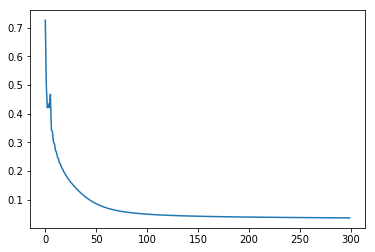

In [70]:
train(X,Y,model,epochs=300)

In [71]:
predictions=model.predict(X)

In [73]:
print(predictions)

[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 

In [75]:
acc=np.sum((predictions==Y))/Y.shape[0]

In [76]:
print(acc)

0.976
